## Load data

In [1]:
import pandas as pd
data = pd.read_csv("turnover.csv")
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [4]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

## Encoding categoreis (salary)

In [5]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes

data.salary.head()

0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int8

## Getting Dummies (department)

In [6]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [7]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new DataFrame "departments" to your employee dataset: done
data = data.join(departments)

data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


## Percentage of employees who churn

In [8]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.churn.value_counts())

# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


## Correlations

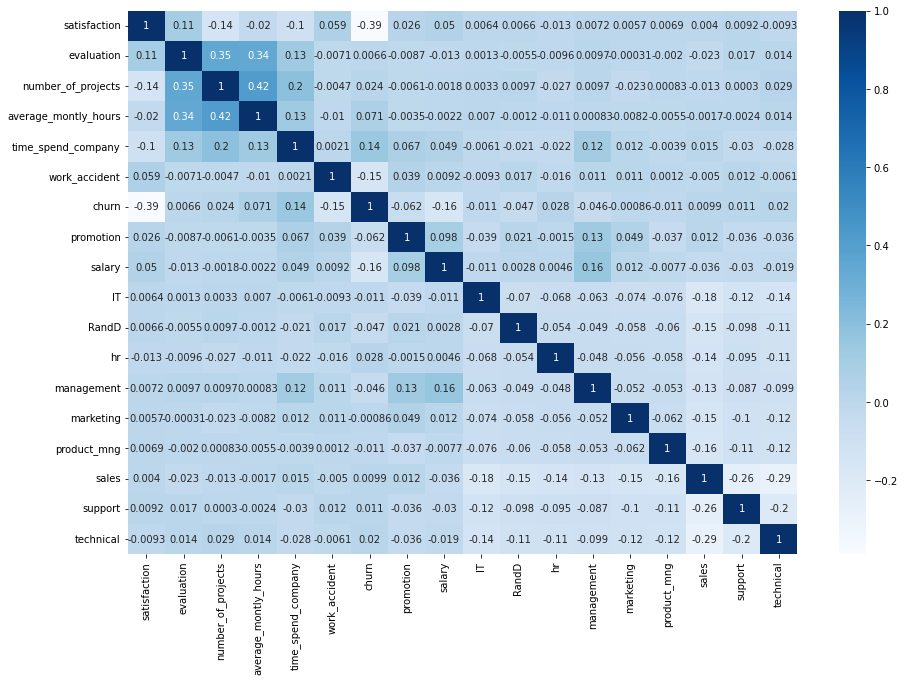

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

## Separating target and features

In [10]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

## Spliting employee data

In [11]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

## Computing Gini index

In [12]:
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)
gini

0.060995563603440474

## Splitting the tree

In [13]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


## Fitting the tree to employee data

In [14]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

## Checking the accuracy of prediction

In [15]:
# Apply a decision tree model to fit features to the target in the training set
model.fit(features_train, target_train)

# Check the accuracy score of the prediction for the training set
print(model.score(features_train, target_train)*100)

# Check the accuracy score of the prediction for the test set
print(model.score(features_test, target_test)*100)

100.0
97.22666666666666


## Exporting the tree

In [16]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train, target_train)

# Export the tree to a dot file
export_graphviz(model, "tree.dot")

In [17]:
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()

# graphviz.Source(dot_graph)

## Pruning the tree

In [18]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train, target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train, target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test, target_test)*100)

97.71535247577563
97.06666666666666


## Limiting the sample size

In [19]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train, target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train, target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test, target_test)*100)

96.57747355320473
96.13333333333334


## Calculating accuracy metrics: precision

In [20]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9240641711229947

## Calculating accuracy metrics: recall

In [21]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9632107023411371

## Calculating the ROC/AUC score

In [22]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)

0.9691623087590718

## Plotting the ROC Curve

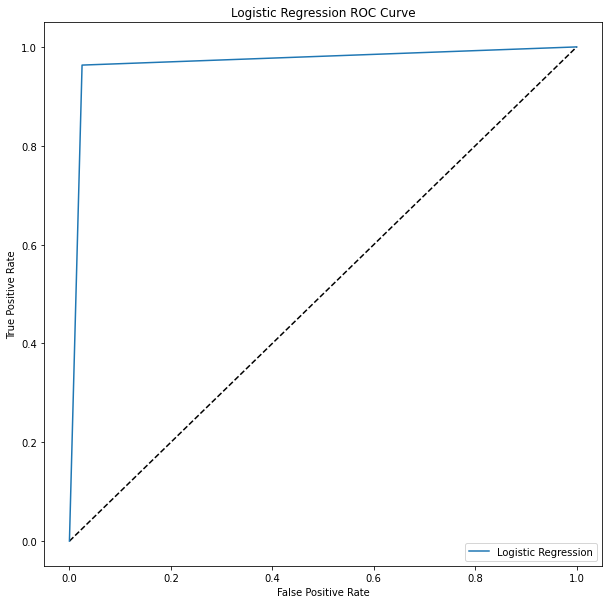

In [23]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(features_test)[:, 1]  # we choose the second column, the one with index 1, 
                                                        # that is, the probabilities of the predictied lables being 1
fpr, tpr, thresholds = roc_curve(target_test, y_pred_prob)

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Balancing classes

In [24]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test, target_test)*100)

93.70666666666668


## Comparison of Employee attrition models

In [25]:
# Print the recall score
print(recall_score(target_test, prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test, prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train, target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(recall_score(target_test, prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test, prediction_b))

0.9632107023411371
0.9691623087590718
0.9319955406911928
0.959863876199084


## Plotting the ROC Curve

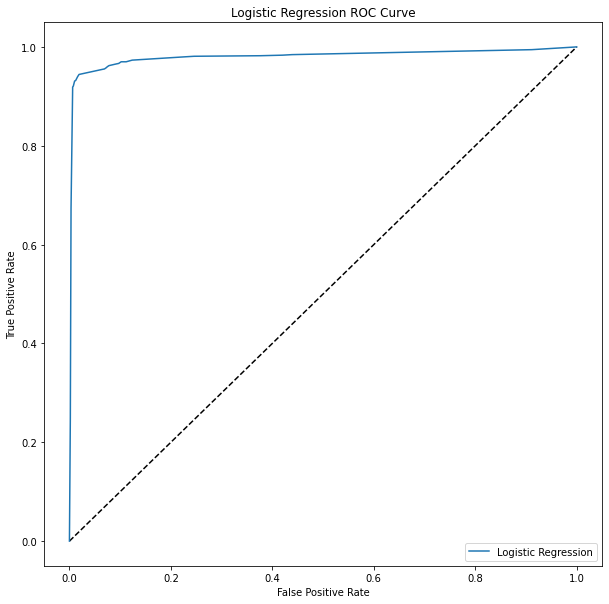

In [26]:
from sklearn.metrics import roc_curve
y_pred_prob_b = model_depth_7_b.predict_proba(features_test)[:, 1]  # we choose the second column, the one with index 1, 
                                                                    # that is, the probabilities of the predictied lables being 1
fpr, tpr, thresholds = roc_curve(target_test, y_pred_prob_b)

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Cross-validation using sklearn

In [27]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model, features, target, cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


## Setting up GridSearch parameters

In [28]:
# Generate values for maximum depth
depth = [i for i in range(5, 21, 1)]

# Generate values for minimum sample size
samples = [i for i in range(50, 500, 50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)
parameters

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400, 450]}

## Implementing GridSearch

In [29]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


## Best model

In [30]:
# Initialize the model
model_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

# Fit it to the training component
model_best.fit(features_train, target_train)

# Make prediction using test component
prediction_best = model_best.predict(features_test)

# Print the recall score for the balanced model
print(recall_score(target_test, prediction_best))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test, prediction_best))

0.9063545150501672
0.9442392974830226


## Sorting important features

In [31]:
# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.551529
time_spend_company,0.157009
evaluation,0.144354
number_of_projects,0.092864
average_montly_hours,0.053087
technical,0.000631
hr,0.000295
salary,0.000231
promotion,0.000000
work_accident,0.000000


## Selecting important features

In [32]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

## Develop and test the best model

In [33]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight='balanced', random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

95.28
91.75027870680044
94.07002193314084


## Alternative methods
- Logistic Regression
- Tree based
  - Random Forest
  - Gradient Boosting
- Neural Networks